In [2]:
from board import Board
import numpy as np
import matplotlib.pyplot as plt
import random

from multiprocessing import Pool
import ray
ray.init()

2024-05-16 17:46:10,017	INFO worker.py:1749 -- Started a local Ray instance.


Python version:,3.11.9
Ray version:,2.22.0


In [3]:
sample = 100
H, W = 256, 256
tests = []
for _ in range(sample):
    start = Board.random_board(H, W)
    end = start.clone()
    for cnt in range(random.randint(0, 100)):
        cut = np.random.randint(0, 2, (random.randint(1, 256), random.randint(1, 256)))
        to = random.randint(0, 4)
        x, y = np.random.randint(-1*H//2, H//2), np.random.randint(-1*W//2, W//2)

        if to == 0:
            end = end.op_up(cut, x, y)
        elif to == 1:
            end = end.op_down(cut, x, y)
        elif to == 2:
            end = end.op_left(cut, x, y)
        elif to == 3:
            end = end.op_right(cut, x, y)

    tests.append((start, end, cnt))


In [4]:
@ray.remote
def make_test(sample):
    start, end, cnt = sample
    new, actions = start.fillone(end)
    assert new == end
    # print(f"Test {i} passed. action length: {len(actions)}, cnt: {cnt}")
    return len(actions), cnt

In [5]:
res = [make_test.remote(test) for test in tests]

In [6]:
x = [r[0] for r in ray.get(res)]
y = [r[1] for r in ray.get(res)]

In [8]:
p = Pool() # プロセス数を4に設定
result = p.map(make_test, tests)  # nijou()に0,1,..,9を与えて並列演算
# print(result)
x = [x[0] for x in result]
y = [x[1] for x in result]

Process SpawnPoolWorker-9:
Traceback (most recent call last):
  File "/Users/shuya/.local/share/mise/installs/python/3.11.9/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/shuya/.local/share/mise/installs/python/3.11.9/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/shuya/.local/share/mise/installs/python/3.11.9/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/Users/shuya/.local/share/mise/installs/python/3.11.9/lib/python3.11/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'make_test' on <module '__main__' (built-in)>
Process SpawnPoolWorker-10:
Traceback (most recent call last):
  File "/Users/shuya/.local/share/mise/installs/python/3.11.9/lib/python3.11/multiprocessing/process.py", line 314, in _boot

In [ ]:
x, y = [], []
for i in range(sample):
    start, end, cnt = tests[i]
    new, actions = start.fillone(end)
    assert new == end
    print(f"Test {i} passed. action length: {len(actions)}, cnt: {cnt}")
    x.append(len(actions))
    y.append(cnt)

Test 0 passed. action length: 71583, cnt: 20
Test 1 passed. action length: 71627, cnt: 83
Test 2 passed. action length: 71923, cnt: 90
Test 3 passed. action length: 66523, cnt: 3
Test 4 passed. action length: 73186, cnt: 88
Test 5 passed. action length: 72160, cnt: 16
Test 6 passed. action length: 70087, cnt: 9
Test 7 passed. action length: 65792, cnt: 1
Test 8 passed. action length: 72096, cnt: 19


KeyboardInterrupt: 

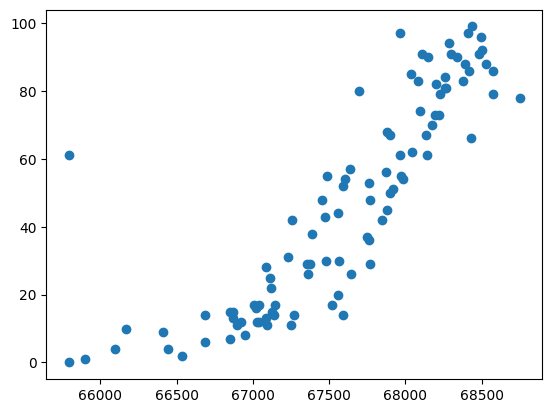

In [ ]:
plt.scatter(x, y)

In [ ]:
actions[:500]

[(0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'),
 (0, 0, 'left'

In [ ]:
# 0のみで256 256
